# Finding the Best Neighborhood in Relation to Median Age at Death
Health is a major component to happiness. Those who live longer tend to lead happier, healthier lives. Areas where young deaths are common tend to have higher crime and/or be more dangerous areas. In this notebook, I will be determining what the best area in Pittsburgh to live is based off of the median age at death. Areas with a higher median age at death will be the safer, happier, and healthier areas in Pittsburgh, while those with a lower median may have higher crime and/or be areas where good health is hard to come by.

## Identifying High and Low Median Age at Death Areas
Let's first find the median age at death for all the neighborhoods in Pittsburgh...

In [5]:
import pandas as pd
data = pd.read_csv('nhoodmedianage20112015.csv', sep='\s*,\s*', engine='python')

pd.set_option('display.max_rows', 999)

data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']]
    

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
1,CHATEAU,NaN
2,NORTH SHORE,80.0
3,ALLEGHENY WEST,65.0
4,SAINT CLAIR,67.5
5,WEST END,77.5
6,ESPLEN,71.7
7,ARLINGTON HEIGHTS,63.7
8,STRIP DISTRICT,72.5
9,FAIRYWOOD,53.3


OOF. Let's make a bar graph so it's esier to see the spread.

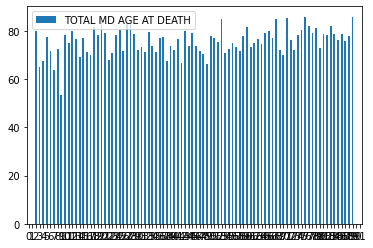

In [30]:
ax = data.plot.bar(y = 'TOTAL MD AGE AT DEATH', rot=0)


Now, lets find the 10 neigborhoods with the highest median age at death neighborhoods...

In [17]:
data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']].nlargest(10, 'TOTAL MD AGE AT DEATH',keep='first')

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
89,SQUIRREL HILL SOUTH,85.9
76,NORTH OAKLAND,85.6
71,BANKSVILLE,85.5
53,POINT BREEZE,85.1
68,SQUIRREL HILL NORTH,85.0
20,CENTRAL OAKLAND,84.0
28,NEW HOMESTEAD,83.4
27,SWISSHELM PARK,83.1
77,OVERBROOK,82.2
83,SHADYSIDE,82.1


Now lets find the gap between the highest and lowest value in this table of the 10 highest median age at death neighborhoods...

In [30]:
from decimal import Decimal, getcontext
gap = Decimal('85.9') - Decimal('82.1')
print(gap)

3.8


Almost done! Now, let's find the 10 neighborhoods with the lowest median age at death (due to missing data in dataset, neighborhood SOUTH SHORE should be **IGNORED**)

In [31]:
data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']].nsmallest(11, 'TOTAL MD AGE AT DEATH',keep='first')

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
9,FAIRYWOOD,53.3
7,ARLINGTON HEIGHTS,63.7
3,ALLEGHENY WEST,65.0
49,EAST ALLEGHENY,66.2
42,ALLENTOWN,66.5
38,MANCHESTER,67.4
4,SAINT CLAIR,67.5
22,NORTHVIEW HEIGHTS,68.0
14,CALIFORNIA-KIRKBRIDE,69.3


Finally, lets find the gap between the highest and lowest value in this table of the 10 lowest median age at death neighborhoods...

In [33]:
gap = Decimal('70.0') - Decimal('53.3')
print(gap)

16.7


# Analyzing Interesting Anomalies in Data
As you can see, the values of the neighborhoods with the highest median age at death are all relitively similar, with a gap of 3.8 between the highest and lowest median age at death. The values of the neighborhoods with the lowest median age at death, however, seem to vary, with a 16.7 year gap in age between the highest and lowest median age at death. Why is that? Let's look at more data on the neighborhood of FAIRYWOOD.

In [35]:
data.iloc[9]

NEIGHBORHOOD             FAIRYWOOD
BLACKdeaths                   11.0
Black MD AGE AT DEATH         62.5
WHITEdeaths                    9.0
White MD AGE AT DEATH         42.5
TOTALdeaths*                  21.0
TOTAL MD AGE AT DEATH         53.3
Name: 9, dtype: object

After looking at more data, we can see that we are finding the median for only 21 deaths. Let's see if that is that is above or below the average for this data set... **(In this data set TOTALdeaths* counts all deaths including deaths from Other and Uknown races.)**

In [41]:
data['TOTALdeaths*'].mean()

171.2111111111111

This average seems WAY higher than the average for FAIRYWOOD. Let's see if this is being weighted by just one large total death count, or if FAIRYWOOD has a very low total death count compared to most of the other neighborhoods.

In [3]:
data[['NEIGHBORHOOD', 'TOTALdeaths*']].nlargest(50, 'TOTALdeaths*', keep='first')

,NEIGHBORHOOD,TOTALdeaths*
89,SQUIRREL HILL SOUTH,802.0
88,BROOKLINE,750.0
87,CARRICK,678.0
86,BRIGHTON HEIGHTS,496.0
85,MOUNT WASHINGTON,476.0
84,BEECHVIEW,434.0
83,SHADYSIDE,406.0
82,BLOOMFIELD,394.0
81,LINCOLN-LEMINGTON-BELMAR,389.0
80,EAST LIBERTY,364.0


Now, after finding the average total death count AND checking to make sure the total death count average is being unfairly weighted by just one area, let's refine out data to find the neighborhoods with the highest and lowest median age at death only in areas with "sufficient" data. For us, this will be a TOTALdeaths* value greater than or equal to 100. We will start by displaying all valid neighborhoods.

In [14]:
refined_data = data[data['TOTALdeaths*'] > 100]
refined_data

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
36,SOUTH OAKLAND,37.0,75.7,63.0,77.5,103.0,77.1
37,WINDGAP,24.0,71.2,80.0,80.4,104.0,77.5
38,MANCHESTER,97.0,67.2,15.0,70.0,113.0,67.4
39,UPPER LAWRENCEVILLE,8.0,48.3,111.0,75.5,119.0,73.7
40,ELLIOTT,28.0,67.0,91.0,73.7,121.0,72.0
41,BELTZHOOVER,105.0,76.1,13.0,76.0,125.0,76.6
42,ALLENTOWN,41.0,55.6,82.0,72.1,126.0,66.5
43,GLEN HAZEL,60.0,80.7,69.0,78.7,131.0,79.8
44,CENTRAL BUSINESS DISTRICT,33.0,64.5,92.0,77.0,133.0,73.9
45,DUQUESNE HEIGHTS,3.0,NaN,131.0,79.3,134.0,79.2


As we can see, eliminating neighborhoods with "insufficient" data has significantly reduced our dataset size. With this new dataset, we can now find a more reliable answer for the highest and lowest median age at death neighborhoods. Let's start with highest...

In [21]:
refined_data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']].nlargest(11, 'TOTAL MD AGE AT DEATH',keep='first')

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
89,SQUIRREL HILL SOUTH,85.9
76,NORTH OAKLAND,85.6
71,BANKSVILLE,85.5
53,POINT BREEZE,85.1
68,SQUIRREL HILL NORTH,85.0
77,OVERBROOK,82.2
83,SHADYSIDE,82.1
60,UPPER HILL,81.7
79,CENTRAL LAWRENCEVILLE,81.3
75,STANTON HEIGHTS,80.5


Now the lowest...

In [22]:
refined_data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']].nsmallest(11, 'TOTAL MD AGE AT DEATH',keep='first')

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
49,EAST ALLEGHENY,66.2
42,ALLENTOWN,66.5
38,MANCHESTER,67.4
70,MARSHALL-SHADELAND,70.0
48,TROY HILL/HERR'S ISLAND,70.3
54,EAST HILLS,70.9
47,CENTRAL NORTHSIDE,71.7
58,KNOXVILLE,71.7
40,ELLIOTT,72.0
69,SHERADEN,72.0


Now, after eliminating areas with insufficint data, we have good idea of what neighborhoods in Pittsburgh have the healthiest population.

## Conclusion
After filtering through the data provided, we have determined that the neighborhood in Pittsburgh with the longest life, and by association the healtiest people, would be Squirrel Hill South. This does not come as to much of a surprise, as Squirrel Hill is known as a very good neighborhood. The place with the lowest life, and by association the least healthy people, is the neighborhood of East Allegheny. With this data we can not determine if the low median age at death is caused by health issues or safety issues, but .